# Assignment 4

## Name: Jonathan Sands

## Due Date: Thursday, November 5th, by midnight

### Total number of points: 50 points

---

## Problem 1 (10 points):

### A. (4 points) Which of the following statements are true? Briefly explain your answer.

###### Training a k-nearest-neighbors classifier takes less computational time than testing it.

This statement is true. Because the training process only involves storing classification parameters while the phase involves testing individual points and actually assigning them the class of the k nearest neighbors. The short, simple training process makes KNN algorithms lazy learners.

######  The more training examples, the more accurate the prediction of a k-nearest-neighbors.

False. Overfitting classifier groups is very easy and can cause a loss in the generality of the model.

###### k-nearest-neighbors cannot be used for regression

False. Instead of classifying based on the k nearest neighbors, we take a weighted average of the nearest neighbors, using a distance weighting metric for example.

###### A k-nearest-neighbors is sensitive to the number of features

True. In the classic example, if you want to reduce bias, introduce more features but this will cause you to sacrifice variance. On the other hand, KNN does not help with identifying which attributes are most important to the classification.

### B. (6 points) Figure 2 presents the performance of several algorithms applied to the problem of classifying molecules in two classes: those that inhibit Human Respiratory Syncytial Virus (HRSV), and those that do not. HRSV is the most frequent cause of respiratory tract infections in small children, with a worldwide estimated prevalence of about 34 million cases per year among children under 5 years of age.

###### Which method gives the best performance? Explain your answer. 

VS-RF. You can see on the plot that VS-RF has the highest sensitivity to the lowest specificity out of all of the approaches used. Meaning it gives the highest true positive count to false positive count out of all methods used.

###### The goal of this study is to develop an algorithm that can be used to suggest, among a large collection of several millions of molecules, those that should be experimentally tested for activity against HRSV. Compounds that are active against HSRV are good leads from which to develop new medical treatments against infections caused by this virus. In this context, is it preferable to have a high sensitivity or a high specificity? Which part of the ROC curve is the most interesting?

I believe sensitivity is the key in this specific example. In medicine false positives and often more importantly false negatives can be detrimental to an individuals health. Prioritizing sensitivity is important which leads us to  want to focus on the begining of the chart, where specificity is lowest and, meaning fewer false positives and more true negatives.

###### In this study, the authors have represented the molecules based on 777 descriptors. Those descriptors include the number of oxygen atoms, the molecular weights, the number of rotatable bonds, or the estimated solubility of the molecule. They have fewer samples (216) than descriptors. What is the danger here? How would you solve this issue?

Having too many descriptors (features) can easily lead to high bias in the data. To counter act this, one could take the easy way out and add, in this case significantly, more samples. If samples aren't readily available, the authors could use a dimmensionality reduction method, such as PCA, to scale down the data while maintaining the integrity of it's model. Another method might be going through a decision tree algorithm first, determining which features had the highest impurity reduction or highest information gain and use a select few of those in place of the original descriptor set.

---

## Problem 2 (20 points)

### The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet. The character images were based on 20 different fonts and each letter within these 20 fonts was randomly distorted to produce a file of 20,000 unique stimuli. Each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from 0 through 15. Below is the attribute information, but more information on the data and how it was used for data mining research can be found in the paper:

### P. W. Frey and D. J. Slate. "Letter Recognition Using Holland-style Adaptive Classifiers". (Machine Learning Vol 6 #2 March 91)

### Attribute Information:
#### 1. lettr capital letter (26 values from A to Z)
#### 2. x-box horizontal position of box (integer)
#### 3. y-box vertical position of box (integer)
#### 4. width width of box (integer)
#### 5. high height of box (integer)
#### 6. onpix total # on pixels (integer)
#### 7. x-bar mean x of on pixels in box (integer)
#### 8. y-bar mean y of on pixels in box (integer)
#### 9. x2bar mean x variance (integer)
#### 10. y2bar mean y variance (integer)
#### 11. xybar mean x y correlation (integer)
#### 12. x2ybr mean of x * x * y (integer)
#### 13. xy2br mean of x * y * y (integer)
#### 14. x-ege mean edge count left to right (integer)
#### 15. xegvy correlation of x-ege with y (integer)
#### 16. y-ege mean edge count bottom to top (integer)
#### 17. yegvx correlation of y-ege with x (integer)

### Create a classification model for letter recognition using decision trees as a classification method with a holdout partitioning technique for splitting the data into training versus testing. 

##### (15 points) Changing the values for the depth, number of cases per parent and number of cases per leaf produces different tree configurations with different accuracies for training and testing. Choose at least five different configurations and report the accuracy for training and testing for each one of them. Which configuration will you choose as the best model? Explain your answer.

In [2]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from collections import Counter
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [8]:
#Read Data into a variable 'data'
data = pd.read_csv(r'D:\DePaul\DSC 441\letter-recognition.data', header = None)

#Split the data using the hold-out method into a train and a test set
Train, Test = model_selection.train_test_split(data, train_size = 0.8, random_state = 0)

#Split the columns for training data
xTrain = Train.iloc[:,1:]
yTrain = Train.iloc[:,0]

#Split columns for test data
xTest = Test.iloc[:,1:]
yTest = Test.iloc[:,0]

In [9]:
#Run a decision tree on the default parameters

clf = tree.DecisionTreeClassifier()

clf = clf.fit(xTrain, yTrain)

prediction = clf.predict(xTest)

print('The R squared score is :  {}'.format(clf.score(xTest, yTest)))

print('\nThe total nodes for the tree are {}'.format(clf.tree_.node_count))

print('\nThe acuracy of this decision tree classifier is {}'.format(accuracy_score(yTest, prediction)))

The R squared score is :  0.88025

The total nodes for the tree are 4005

The acuracy of this decision tree classifier is 0.88025


In [10]:
#Implement decision trees with in all possible combinations of the below parameters and store the accuracy score in a list Report

depth_list = [5, 10, 15, 20 ,25]

parent_list = [ 2, 5, 10, 15, 20 ,25, 30, 50, 60]

leaf_list = [ 1, 5, 10, 15, 20 ,25, 30, 50 ,60]

Report = list()

for i in range(0, len(depth_list)):
    
    for j in range(0, len(parent_list)):
            
            for k in range(0, len(leaf_list)):
    
                clf = tree.DecisionTreeClassifier(max_depth = depth_list[i], min_samples_split = parent_list[j], min_samples_leaf = leaf_list[k])
    
                clf.fit(xTrain, yTrain)
    
                prediction = clf.predict(xTest)
    
                pair = [depth_list[i], parent_list[j], leaf_list[k], accuracy_score(yTest, prediction)]
    
                Report.append(pair)
    
print(Report)

[[5, 2, 1, 0.3815], [5, 2, 5, 0.3815], [5, 2, 10, 0.382], [5, 2, 15, 0.3805], [5, 2, 20, 0.3805], [5, 2, 25, 0.379], [5, 2, 30, 0.3795], [5, 2, 50, 0.37975], [5, 2, 60, 0.37925], [5, 5, 1, 0.3815], [5, 5, 5, 0.3815], [5, 5, 10, 0.382], [5, 5, 15, 0.3805], [5, 5, 20, 0.3805], [5, 5, 25, 0.379], [5, 5, 30, 0.3795], [5, 5, 50, 0.37975], [5, 5, 60, 0.37925], [5, 10, 1, 0.3815], [5, 10, 5, 0.3815], [5, 10, 10, 0.382], [5, 10, 15, 0.3805], [5, 10, 20, 0.3805], [5, 10, 25, 0.379], [5, 10, 30, 0.3795], [5, 10, 50, 0.37975], [5, 10, 60, 0.37925], [5, 15, 1, 0.3815], [5, 15, 5, 0.3815], [5, 15, 10, 0.382], [5, 15, 15, 0.3805], [5, 15, 20, 0.3805], [5, 15, 25, 0.379], [5, 15, 30, 0.3795], [5, 15, 50, 0.37975], [5, 15, 60, 0.37925], [5, 20, 1, 0.3815], [5, 20, 5, 0.3815], [5, 20, 10, 0.382], [5, 20, 15, 0.3805], [5, 20, 20, 0.3805], [5, 20, 25, 0.379], [5, 20, 30, 0.3795], [5, 20, 50, 0.37975], [5, 20, 60, 0.37925], [5, 25, 1, 0.3815], [5, 25, 5, 0.3815], [5, 25, 10, 0.382], [5, 25, 15, 0.3805], [

 I tried creating some code to find the max error but instead thought it was just as easy to print it out and control f search the text. Using said method I found that in the Report list, the highest accuracy, 0.879, came from using a max depth of 25, minimum splitting sample requirement of 2, and a minimum leaf requirement of 1.

###### (4 points) For the best tree configuration, report the classification matrix and interpret it. In your opinion, is accuracy a good way to interpret the performance of the model? If not, suggest other measures

In [11]:
#Reset the decision tree 

clf = tree.DecisionTreeClassifier(max_depth = 25)

clf = clf.fit(xTrain, yTrain)

prediction = clf.predict(xTest)

In [12]:
#Classification Matrix

pd.set_option('display.max_columns',26)
pd.set_option('display.max_row',260)
confusionMatrix = pd.DataFrame(data = confusion_matrix(yTest, prediction))
confusionMatrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,140,0,0,0,1,0,0,1,0,0,0,1,2,0,0,0,0,0,1,1,0,0,0,0,0,0
1,2,117,0,3,1,1,3,3,1,2,2,0,0,0,0,1,2,4,5,0,1,2,2,6,0,0
2,1,0,142,0,0,0,3,0,0,0,0,0,0,0,1,0,3,0,3,1,1,1,0,0,0,0
3,2,3,0,143,0,1,1,10,0,0,0,0,0,2,4,0,0,2,1,0,1,0,0,1,0,0
4,0,2,0,0,129,0,4,0,0,0,0,2,0,0,0,2,1,0,3,0,0,0,0,1,0,1
5,0,3,0,1,0,143,0,0,2,0,0,1,1,1,0,7,0,0,1,1,0,3,1,0,1,1
6,0,5,3,0,6,0,155,1,0,0,0,5,0,0,1,0,1,0,3,0,0,0,0,1,0,1
7,0,1,0,1,0,0,3,104,0,1,7,0,0,0,1,0,1,2,1,0,1,0,0,0,0,0
8,0,0,0,1,1,0,1,0,113,6,0,0,0,0,0,0,1,0,3,0,0,0,0,0,1,0
9,0,0,0,2,1,1,0,2,2,139,1,0,0,0,1,0,2,0,1,2,3,0,0,1,0,1


In [19]:
# Number of correct identifications
x = int()
for i in range(len(confusionMatrix.columns)):
    x += confusionMatrix[i][i]
print(x/4000)

0.88025


Above is the correct classification rate that we achieve from the given classification matrix. We take the values of the diagonal, because they are the correct classifications, and sum them to get the total correct classifications. Dividing by total classifications gives us the above result.

In [14]:
#f1 score

print(f1_score(yTest, prediction, average = 'macro'))

0.8799603762475496


I believe accuracy is an good judge in this situation. It closely aligns with other metrics we use such as f1 score and the accurate measures of the confusion matrix divided by the total sample (4000).

###### (1 point) What are the most important three attributes for recognizing the letters?

In [53]:
#Determine the importance of the features

importance = clf.feature_importances_
print('\n')
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))



Feature: 0, Score: 0.01097
Feature: 1, Score: 0.01642
Feature: 2, Score: 0.00716
Feature: 3, Score: 0.01732
Feature: 4, Score: 0.01821
Feature: 5, Score: 0.04866
Feature: 6, Score: 0.05079
Feature: 7, Score: 0.06106
Feature: 8, Score: 0.10888
Feature: 9, Score: 0.07778
Feature: 10, Score: 0.08266
Feature: 11, Score: 0.08539
Feature: 12, Score: 0.14266
Feature: 13, Score: 0.09810
Feature: 14, Score: 0.11988
Feature: 15, Score: 0.05406


The most important attributes are x-ege mean edge count left to right (integer), y2bar mean y variance (integer), and  y-ege mean edge count bottom to top (integer). 

---

## Problem 3 (20 points)

### On the same data from Problem 2, apply a K-nearest neighbor classifier to classify the data. Report the following:

###### (2 points) If you are doing any data transformation, explain the transformation and why it is needed.

In [70]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


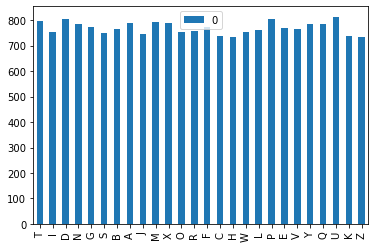

In [101]:
letter_counts = Counter(data[0])
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind='bar')

Our class labels are pretty evenly distributed.

In [83]:
for column in data.columns:
    
    print(max(data[column]))
    print(min(data[column]))

Z
A
15
0
15
0
15
0
15
0
15
0
15
0
15
0
15
0
15
0
15
0
15
0
15
0
15
0
15
0
15
0
15
0


Above we see that all features maintain values in a range from 0-15, and results from A-Z. I feel as though there is no need to transform the data because it is already neatly organized

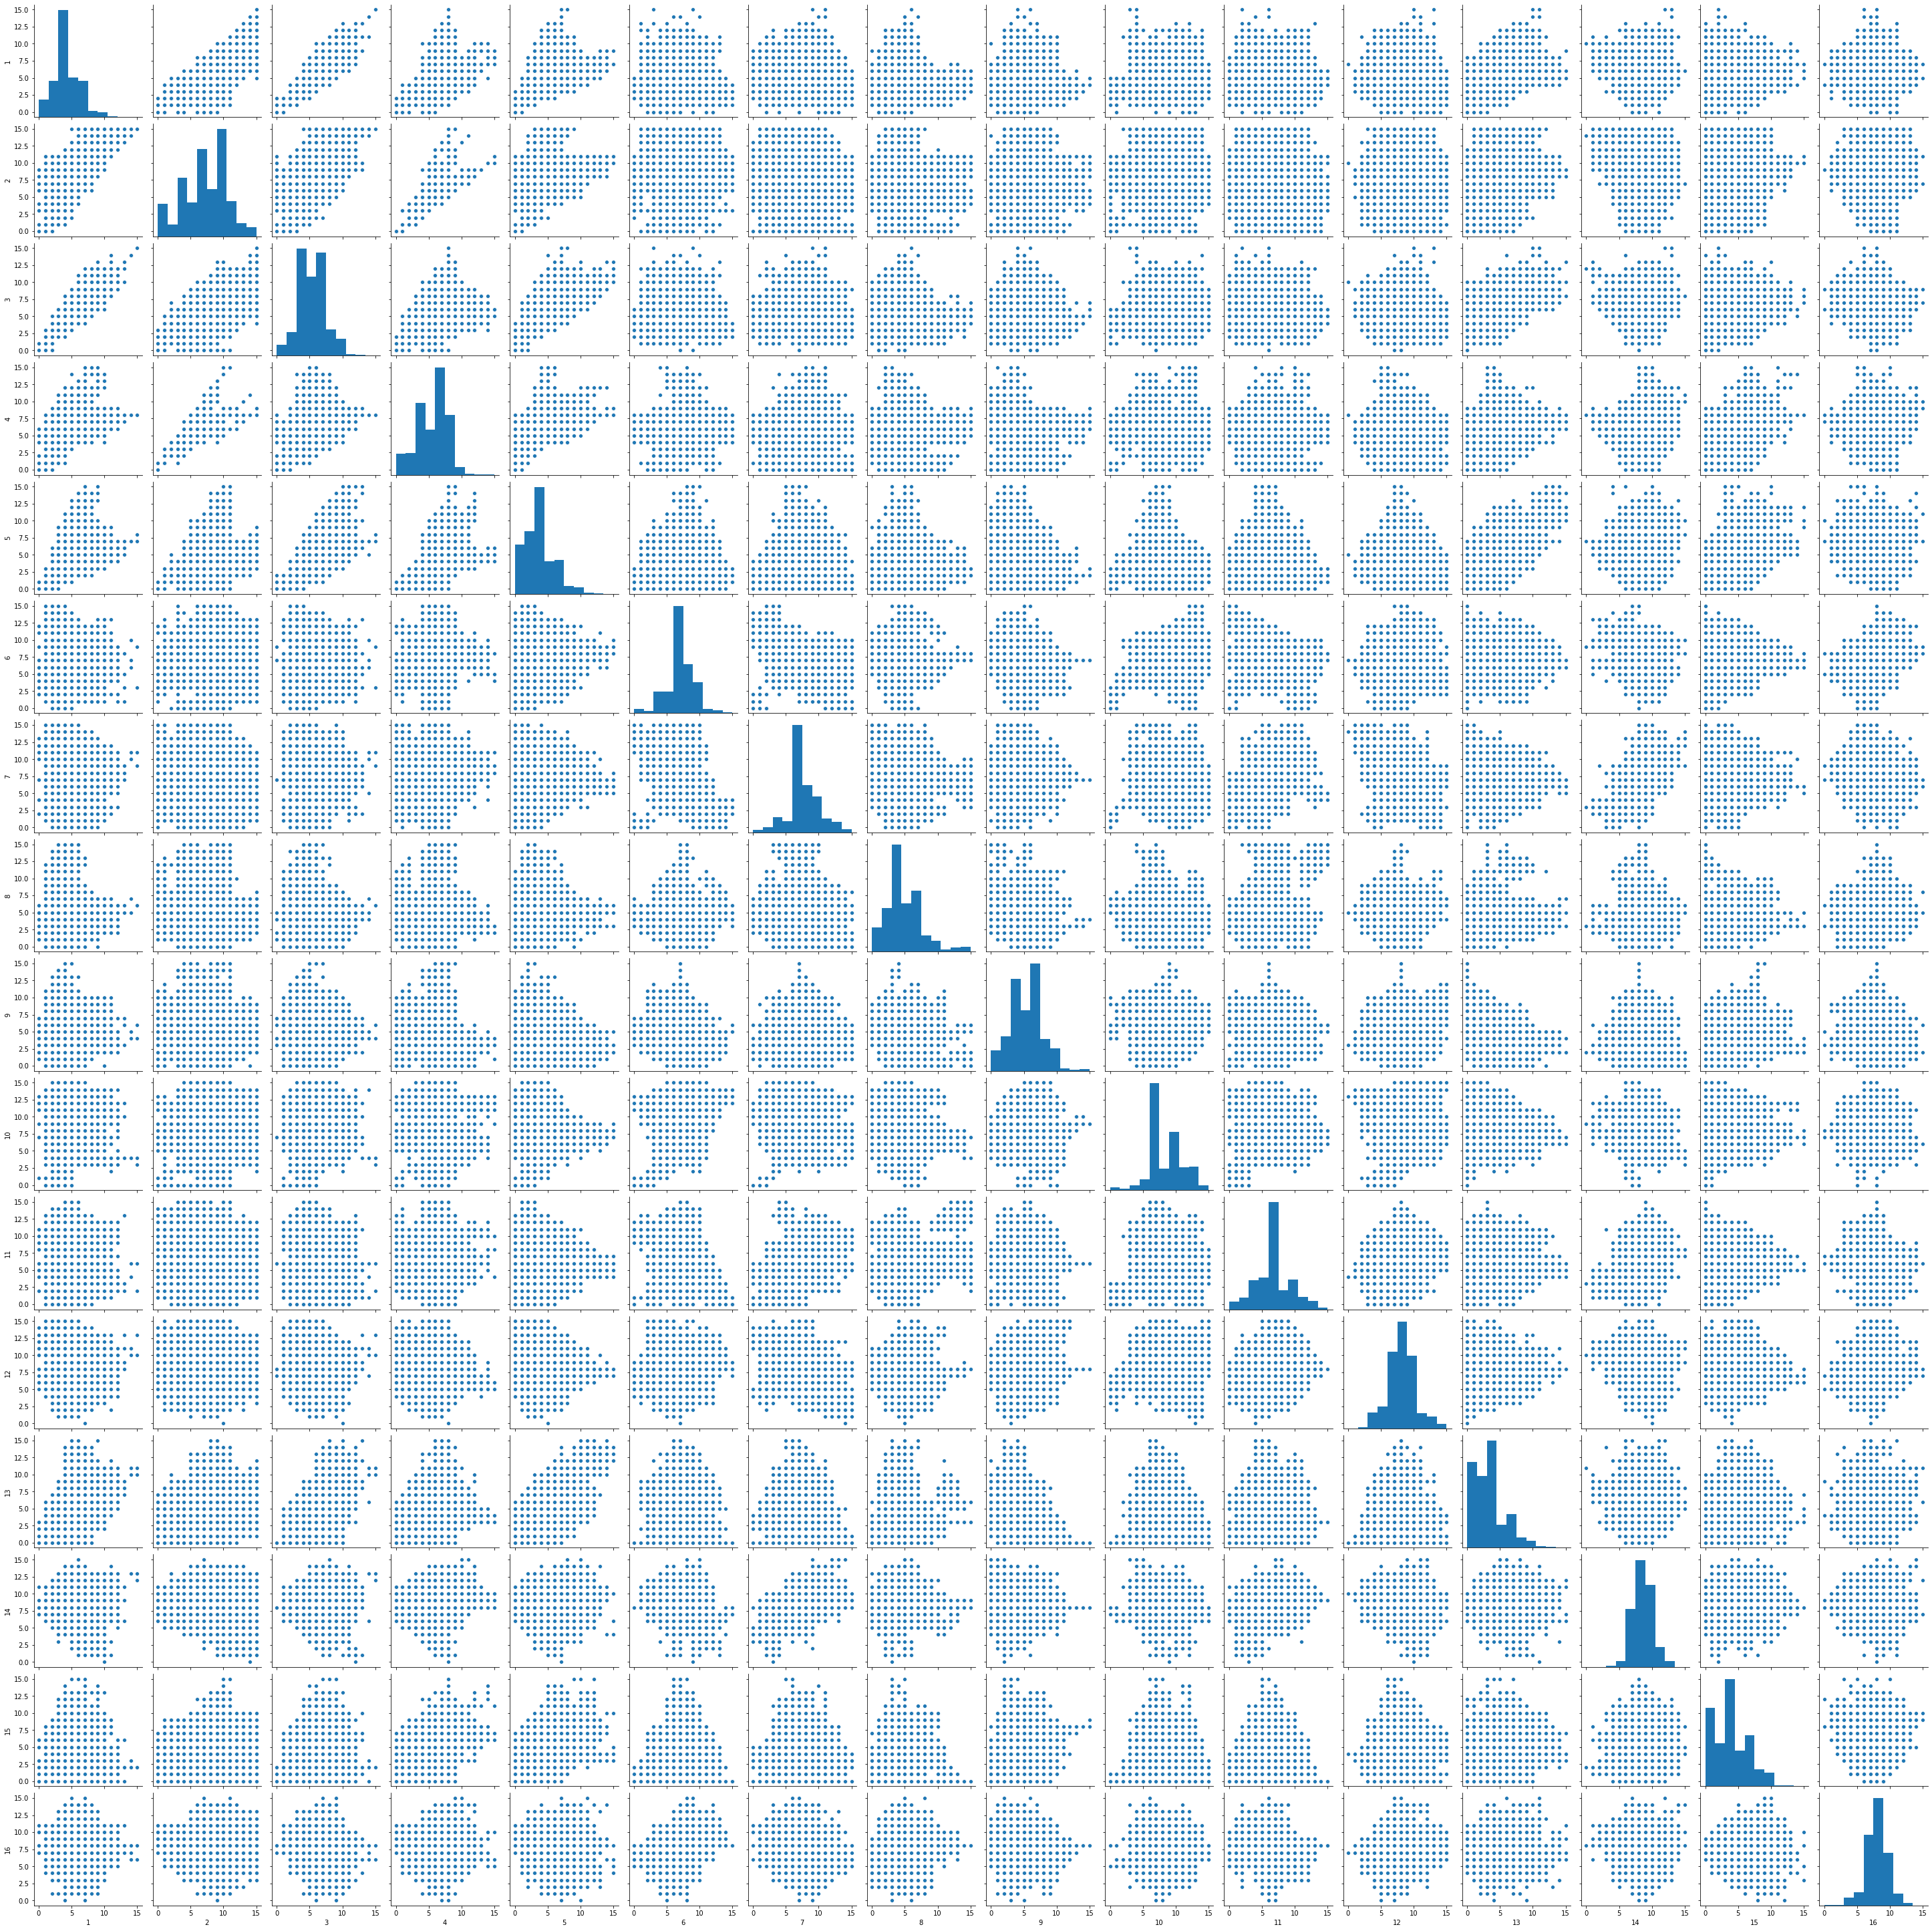

In [84]:
sns.pairplot(data[1:])

There also appears to be little correlation between features that we can get rid of. There is some correlation among the first 5 features but this appears to be due to the domain of the pixels. 

In [87]:
#Split the data using the hold-out method into a train and a test set
Train, Test = model_selection.train_test_split(data, train_size = 0.8, random_state = 0)

#Split the columns for training data
xTrain = Train.iloc[:,1:]
yTrain = Train.iloc[:,0]

#Split columns for test data
xTest = Test.iloc[:,1:]
yTest = Test.iloc[:,0]

###### (16 points) Report the classification matrix and the appropriate performance metrics for different values of K (K=1, 3, 5, and 7). 

In [96]:
#Create a K nearest neighbors classifier with the specified neighbors

neighbors = [1, 3, 5, 7]

report = list()

for i in range(len(neighbors)):
     
    nbrs = KNeighborsClassifier(n_neighbors = neighbors[i])
    
    nbrs.fit(xTrain, yTrain)

    predict = nbrs.predict(xTest)
    
    #Store the number of neighbors, predicted Y, accuracy, f1 score in an array that goes into a list, report
    pair = [neighbors[i], predict, accuracy_score(yTest, predict), f1_score(yTest, predict, average = 'macro')]
    
    report.append(pair)

Above I put all performance metrics for specified neighbor count into an array, which is in a list called report. I used the macro average for f1 scores because there is little class imbalance that needs to be accounted for.

In [130]:
#Confusion matrix
pd.set_option('display.max_columns',26)

print('The accuracy for {} neighbors is {}, f1 score is {}, the confusion matrix is \n'.format(report[0][0], report[0][2], report[0][3]))
confusionMatrix = pd.DataFrame(data = confusion_matrix(yTest, report[0][1]))
confusionMatrix

The accuracy for 1 neighbors is 0.9615, f1 score is 0.9614942326231228, the confusion matrix is 



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,146,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,4,0,1,1,0
2,0,0,154,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,162,0,0,0,2,0,0,1,0,0,0,3,0,1,1,0,0,0,0,0,0,0,0
4,0,0,2,0,137,0,1,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,2,0,0
5,0,1,0,0,0,157,0,0,0,0,0,0,0,1,0,4,0,1,1,1,0,1,0,0,0,0
6,0,3,1,1,1,0,171,0,0,0,0,0,0,0,3,0,0,0,0,0,0,1,1,0,0,0
7,0,0,0,1,1,0,0,111,0,1,2,0,1,0,0,0,0,5,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,124,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,3,154,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [107]:
# Number of correct identifications
x = int()
for i in range(len(confusionMatrix.columns)):
    x += confusionMatrix[i][i]
print(x)

3846


In [131]:
print('The accuracy for {} neighbors is {}, f1 score is {}, the confusion matrix is \n'.format(report[1][0], report[1][2], report[1][3]))

confusionMatrix = pd.DataFrame(data = confusion_matrix(yTest, report[1][1]))

confusionMatrix

The accuracy for 3 neighbors is 0.9565, f1 score is 0.9565414743060091, the confusion matrix is 



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,153,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,2,0,0,0,0
2,0,0,153,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,165,0,0,1,1,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
4,0,0,2,0,134,0,2,0,0,0,1,2,0,0,0,0,2,0,0,0,0,0,0,1,0,1
5,0,1,0,0,0,157,0,0,0,0,0,0,0,2,0,5,0,1,0,0,0,0,1,0,0,0
6,0,4,0,5,4,0,165,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
7,0,1,0,2,0,0,2,111,0,0,2,0,1,0,0,0,0,3,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,121,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,6,152,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [132]:
# Number of correct identifications
x = int()
for i in range(len(confusionMatrix.columns)):
    x += confusionMatrix[i][i]
print(x)

3826


In [133]:
print('The accuracy for {} neighbors is {}, f1 score is {}, the confusion matrix is \n'.format(report[2][0], report[2][2], report[2][3]))

confusionMatrix = pd.DataFrame(data = confusion_matrix(yTest, report[2][1]))

confusionMatrix

The accuracy for 5 neighbors is 0.95975, f1 score is 0.9597957383367192, the confusion matrix is 



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,152,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,2,0,0,0,0
2,0,0,153,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,164,0,0,1,2,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,139,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1
5,0,2,0,0,0,156,0,0,1,0,0,0,0,2,0,4,0,0,0,1,0,0,1,0,0,0
6,0,2,0,4,3,0,172,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,0,2,0,3,0,0,1,111,0,0,1,0,1,0,0,0,0,3,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,120,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,5,153,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [111]:
# Number of correct identifications
x = int()
for i in range(len(confusionMatrix.columns)):
    x += confusionMatrix[i][i]
print(x)

3839


In [134]:
print('The accuracy for {} neighbors is {}, f1 score is {}, the confusion matrix is \n'.format(report[3][0], report[3][2], report[3][3]))

confusionMatrix = pd.DataFrame(data = confusion_matrix(yTest, report[3][1]))

confusionMatrix

The accuracy for 7 neighbors is 0.95875, f1 score is 0.9588236207750473, the confusion matrix is 



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,151,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,4,0,0,0,1,0,0,0,0
2,0,0,152,0,0,0,1,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,165,0,0,1,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,139,0,2,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0
5,0,1,0,1,0,160,0,0,0,0,0,0,0,2,0,1,0,0,0,1,0,0,1,0,0,0
6,0,3,0,2,4,0,170,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0
7,0,2,0,4,0,0,1,111,0,0,1,0,1,0,0,0,0,3,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,121,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,5,152,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [135]:
# Number of correct identifications
x = int()
for i in range(len(confusionMatrix.columns)):
    x += confusionMatrix[i][i]
print(x)

3835


#### (2 points) Interpret the results and also compare them with the ones obtained by using the decision trees

Overall the results for clustering seemed to perform significantly better than results based on decision trees. The highest accuracy from decision trees was around 87% while clustering achieved a minimum of 95% accuracy. A single cluster received 96% accuracy but I feel as though this is a bit useless because we want to be able to have more distinction among cases than just generalizing them into a single cluster. 

After each classification matrix, including the decision tree one, I printed the number of correct identifications. The neighbors methods produced about 300 more correct identifications than even the most accurate tree method did